Recursive Feature Elimination es un algoritmo que selecciona las columnas mas importantes de un dataset. El tener menos columnas puede ayudar a que los algoritmos de Machine Learning que son entrenados con dicho dataset sean mas eficientes y efectivos. 

El algoritmo RFE funciona con algoritmo de Machine Learning por debajo, lo que lo convierte en un algoritmo de selección de características de tipo Wrapper.

#Utilizando RFE para clasificación:

### Evaluación de un modelo de RFE para clasificación:

In [ ]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

# Se genera un dataset y su vector de clasificación binaria.
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)

# Se crea el modelo para realizar la selección. Se va a utilizar el RFE con un algoritmo de selección de Árbol de Decisión,
# el cual va a ser el que se va a encargar de determinar cuáles son los 5 features mas relevantes.
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)
model = DecisionTreeClassifier()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])

# Se evalúa el modelo utilizando el algoritmo de RepeatedStratifiedKFold, en el cual se realiza una validación cruzada de diferentes combinaciones de datos.
# Luego, se genera un arreglo con los resultados de validación cruzada.
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

# Se reportan los resultados.
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))




Accuracy: 0.884 (0.033)


### Predecir resultados utilizando RFE

In [ ]:
# Se entrena el modelo RFE con el creado previamente.
pipeline.fit(X, y)

# Se realiza una predicción dado un ejemplo.
data = [[2.56999479,-0.13019997,3.16075093,-4.35936352,-1.61271951,-1.39352057,-2.48924933,-1.93094078,3.26130366,2.05692145]]
yhat = pipeline.predict(data)
print('Predicted Class: %d' % (yhat))

Predicted Class: 1


# Utilizando RFE para regresión.

### Se crea y evalúa un modelo de RFE para regresión.

In [ ]:

from sklearn.datasets import make_regression
from sklearn.model_selection import RepeatedKFold
from sklearn.tree import DecisionTreeRegressor

# Se crea un dataset para regresión.
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)

# Se define el modelo de RFE, que en este caso va a estar utilizando un árbol de decisión para regresión.
rfe = RFE(estimator=DecisionTreeRegressor(), n_features_to_select=5)
model = DecisionTreeRegressor()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])


# Se evalúa el modelo utilizando el algoritmo K-fold repetido y se generan resultados basados en MAE. 
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')

# Se reportan los resultados.
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: -27.408 (2.945)


### Realizando predicción de regresión utilizando RFE.

In [ ]:
# fit the model on all available data
pipeline.fit(X, y)
# make a prediction for one example
data = [[-2.02220122,0.31563495,0.82797464,-0.30620401,0.16003707,-1.44411381,0.87616892,-0.50446586,0.23009474,0.76201118]]
yhat = pipeline.predict(data)
print('Predicted: %.3f' % (yhat))

Predicted: -84.288


# Diferentes Hiperparámetros para configurar el RFE.

### Trabajando con diferente número de features en el RFE. 

>2 0.715 (0.043)
>3 0.824 (0.036)
>4 0.877 (0.032)
>5 0.886 (0.031)
>6 0.885 (0.031)
>7 0.890 (0.024)
>8 0.879 (0.028)
>9 0.889 (0.026)


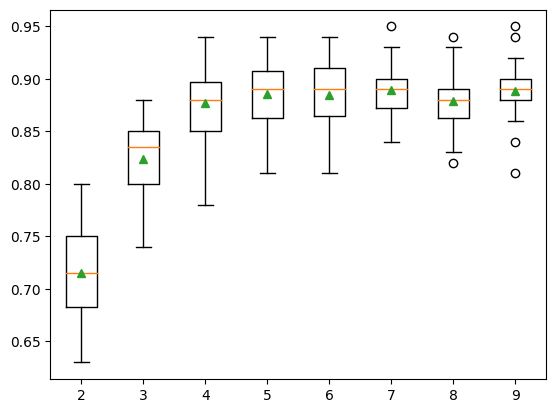

In [ ]:

from sklearn.datasets import make_classification
from matplotlib import pyplot
 
# Método para obtener un dataset, en este caso de clasificación.
def get_dataset():
 X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
 return X, y
 
# Método para genera un diccionario con diferentes modelos.
def get_models():
 models = dict()
 for i in range(2, 10):
  rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=i)
  model = DecisionTreeClassifier()
  models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])
 return models
 
# Método para evaluar un modelo dado, con un dataset.
def evaluate_model(model, X, y):
 cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
 scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
 return scores
 
X, y = get_dataset()
models = get_models()
results, names = list(), list()
for name, model in models.items():
 scores = evaluate_model(model, X, y)
 results.append(scores)
 names.append(name)
 print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

### Utilizando la selección automática del número de features con la clase RFECV

In [ ]:
from sklearn.feature_selection import RFECV

X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)

# Utilizando RFECV. Como se puede observar, no se pone una cantidad de features.
rfe = RFECV(estimator=DecisionTreeClassifier())
model = DecisionTreeClassifier()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.885 (0.028)


### Visualizar información acerca de las columnas o features seleccionados por el RFE

In [ ]:
# Se corre el RFE con el dataset creado previamente
rfe.fit(X, y)

# Se muestran cúales de las columnas fueron elegidas por el rfe, así como su rango en cuanto a importancia.
for i in range(X.shape[1]):
 print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

Column: 0, Selected False, Rank: 4.000
Column: 1, Selected False, Rank: 5.000
Column: 2, Selected True, Rank: 1.000
Column: 3, Selected True, Rank: 1.000
Column: 4, Selected True, Rank: 1.000
Column: 5, Selected False, Rank: 6.000
Column: 6, Selected True, Rank: 1.000
Column: 7, Selected False, Rank: 3.000
Column: 8, Selected True, Rank: 1.000
Column: 9, Selected False, Rank: 2.000


>lr 0.891 (0.031)
>per 0.846 (0.041)
>cart 0.885 (0.031)
>rf 0.858 (0.039)
>gbm 0.892 (0.031)


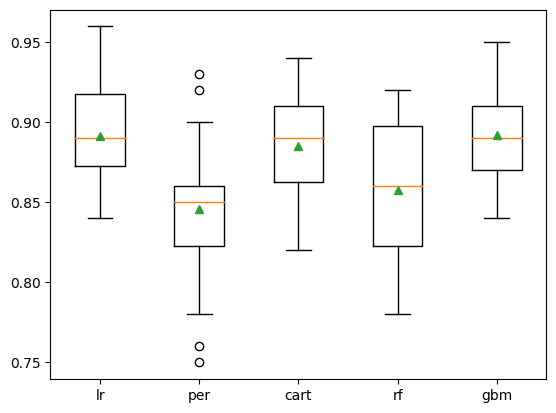

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
# Método que genera un dataset de clasificación.
def get_dataset():
 X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
 return X, y
 
# Método que genera modelos utilizando diferentes algoritmos como estimadores
def get_models():
 models = dict()
 # lr
 rfe = RFE(estimator=LogisticRegression(), n_features_to_select=5)
 model = DecisionTreeClassifier()
 models['lr'] = Pipeline(steps=[('s',rfe),('m',model)])
 # perceptron
 rfe = RFE(estimator=Perceptron(), n_features_to_select=5)
 model = DecisionTreeClassifier()
 models['per'] = Pipeline(steps=[('s',rfe),('m',model)])
 # cart
 rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)
 model = DecisionTreeClassifier()
 models['cart'] = Pipeline(steps=[('s',rfe),('m',model)])
 # rf
 rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=5)
 model = DecisionTreeClassifier()
 models['rf'] = Pipeline(steps=[('s',rfe),('m',model)])
 # gbm
 rfe = RFE(estimator=GradientBoostingClassifier(), n_features_to_select=5)
 model = DecisionTreeClassifier()
 models['gbm'] = Pipeline(steps=[('s',rfe),('m',model)])
 return models
 
# Método que evalúa un modelo utilizando un dataset determinado.
def evaluate_model(model, X, y):
 cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
 scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
 return scores
 
X, y = get_dataset()
models = get_models()
results, names = list(), list()
for name, model in models.items():
 scores = evaluate_model(model, X, y)
 results.append(scores)
 names.append(name)
 # se imprimen y grafican los resultados para cada modelo, para determinar cuál es el mas preciso.
 print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()